In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
#Loading Datasets
country = pd.read_csv('C:/Users/aayus/PycharmProjects/Python_Project/GlobalLandTemperaturesByCountry.csv')
global_temp = pd.read_csv('C:/Users/aayus/PycharmProjects/Python_Project/GlobalTemperatures.csv')

Trend in Global Temperature

In [3]:
global_temp = global_temp.set_index('dt')
global_temp.index = pd.to_datetime(global_temp.index)
global_temp = global_temp.resample('A').mean()
global_temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-12-31,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN
1751-12-31,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN
1752-12-31,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN
1753-12-31,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN
1754-12-31,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN


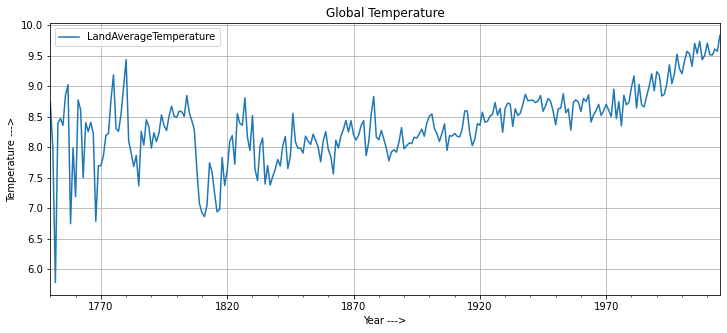

In [4]:
x = global_temp.loc[:,['LandAverageTemperature']]
x.plot(figsize =(12,5))
plt.title('Global Temperature')
plt.xlabel("Year --->")
plt.ylabel("Temperature --->")
plt.grid(True)

The global mean temperature graph is definitely showing an upward trend. We can use the dataframe country to further evaluate whether the upward trend is uniform or contributed by some selected countries

Countries with Minimum and Maximum temperature difference over years

In [5]:
country=country.set_index('dt')
country.index=pd.to_datetime(country.index)
country.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


In [6]:
country_diff=country.groupby([country.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
country_diff.head()

,Year,Country,AverageTemperature
0,1743,Albania,8.620
1,1743,Andorra,7.556
2,1743,Austria,2.482
3,1743,Belarus,0.767
4,1743,Belgium,7.106


In [7]:
country_diff=country_diff.groupby(['Country']).AverageTemperature.agg(['max','min']).reset_index()
country_diff['diff']=country_diff['max']-country_diff['min']
country_diff.head()

,Country,max,min,diff
0,Afghanistan,18.379571,12.547167,5.832405
1,Africa,25.472500,23.036000,2.436500
2,Albania,14.993875,5.588250,9.405625
3,Algeria,25.215667,10.343000,14.872667
4,American Samoa,27.537917,25.667167,1.870750


Plotting the AverageTemperature for top 10 countries with the highest temperature difference:

In [8]:
country_list_max = country_diff.nlargest(10, columns = 'diff')
country_list_max

,Country,max,min,diff
39,Canada,0.792714,-22.616000,23.408714
180,Russia,-1.628333,-21.342000,19.713667
115,Kazakhstan,8.937250,-8.789000,17.726250
159,North America,6.436000,-11.192667,17.628667
119,Kuwait,27.638667,12.020000,15.618667
234,Uzbekistan,16.188250,0.848000,15.340250
232,United States,12.231000,-2.774667,15.005667
225,Turkmenistan,18.613500,3.693000,14.920500
3,Algeria,25.215667,10.343000,14.872667
114,Jordan,22.228000,7.854500,14.373500


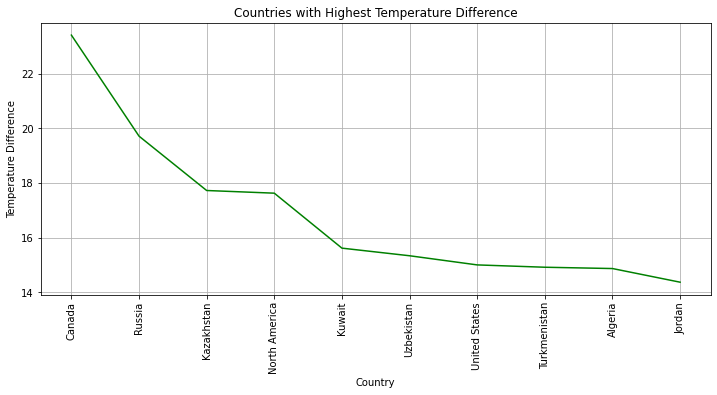

In [9]:
plt.figure(figsize=(12,5))
plt.title('Countries with Highest Temperature Difference')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Temperature Difference')
plt.plot(country_list_max['Country'],country_list_max['diff'],color='g')
plt.grid(True)

Plotting the AverageTemperature for top 10 countries with the lowest temperature difference:

In [10]:
country_list_min = country_diff.nsmallest(10, columns = 'diff')
country_list_min

,Country,max,min,diff
91,Guam,27.778417,26.144083,1.634333
161,Northern Mariana Islands,27.778417,26.144083,1.634333
166,Palau,28.006417,26.262667,1.743750
170,Papua New Guinea,25.419750,23.608917,1.810833
201,Somalia,27.975625,26.159083,1.816542
200,Solomon Islands,27.586250,25.755417,1.830833
203,South America,22.857000,21.024917,1.832083
188,Samoa,27.236667,25.388000,1.848667
4,American Samoa,27.537917,25.667167,1.870750
73,Federated States Of Micronesia,27.997250,26.121250,1.876000


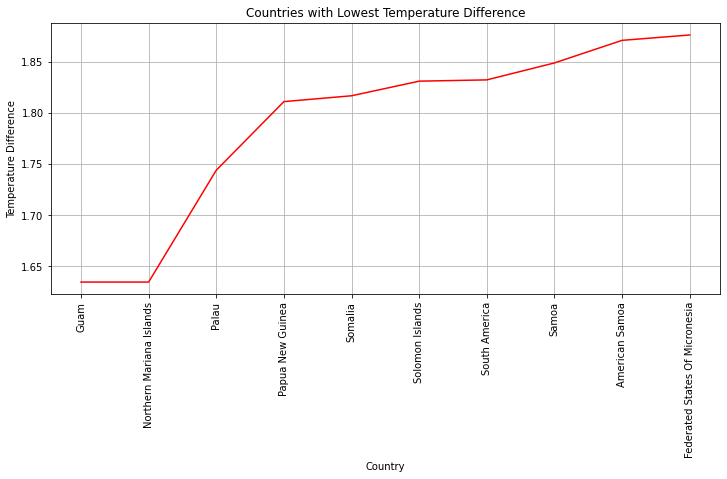

In [11]:
plt.figure(figsize=(12,5))
plt.title('Countries with Lowest Temperature Difference')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Temperature Difference')
plt.plot(country_list_min['Country'],country_list_min['diff'],color='r')
plt.grid(True)

The increase in temperature is not very evident in both the plots. Also the data doesn't seem to be very reliable. So repeating the exercise by first filtering the dataframe country to only represent data after 1900.

Plotting the averageTemperature for countries with the highest temperature difference.

In [12]:
country_filtered=country.groupby([country.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
country_filtered=country_filtered[country_filtered['Year']>=1900]
country_filtered=country_filtered.groupby(['Country']).AverageTemperature.agg(['max','min']).reset_index()
country_filtered['diff']=country_filtered['max']-country_filtered['min']
country_filtered.head()

,Country,max,min,diff
0,Afghanistan,16.533625,12.547167,3.986458
1,Africa,25.472500,23.330083,2.142417
2,Albania,14.993875,11.582500,3.411375
3,Algeria,25.215667,22.171583,3.044083
4,American Samoa,27.537917,25.853500,1.684417


In [13]:
country_list_max = country_filtered.nlargest(10, columns = 'diff')
country_list_max

,Country,max,min,diff
210,Svalbard And Jan Mayen,-3.781000,-9.682667,5.901667
234,Uzbekistan,16.188250,10.626417,5.561833
225,Turkmenistan,18.613500,13.112583,5.500917
115,Kazakhstan,8.937250,3.723750,5.213500
39,Canada,-1.640667,-6.802917,5.162250
228,Ukraine,10.913500,5.811167,5.102333
88,Greenland,-15.409750,-20.446833,5.037083
75,Finland,4.064125,-0.962417,5.026542
58,Denmark,-14.927250,-19.857750,4.930500
144,Mongolia,2.807750,-2.023000,4.830750


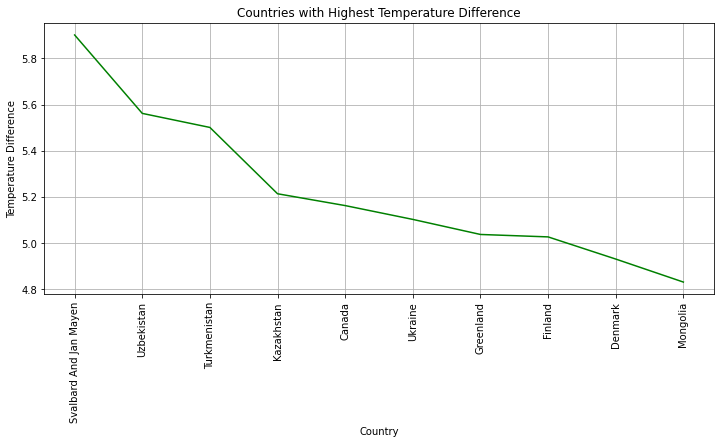

In [14]:
plt.figure(figsize=(12,5))
plt.title('Countries with Highest Temperature Difference')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Temperature Difference')
plt.plot(country_list_max['Country'],country_list_max['diff'],color='g')
plt.grid(True)

Plotting the averageTemperature for countries with the lowest temperature difference.

In [15]:
country_list_min = country_filtered.nsmallest(10, columns = 'diff')
country_list_min

,Country,max,min,diff
44,Chile,10.337000,8.869750,1.467250
207,Sri Lanka,28.175125,26.590000,1.585125
166,Palau,28.006417,26.391333,1.615083
91,Guam,27.778417,26.144083,1.634333
161,Northern Mariana Islands,27.778417,26.144083,1.634333
188,Samoa,27.236667,25.593583,1.643083
4,American Samoa,27.537917,25.853500,1.684417
178,Reunion,24.380500,22.660833,1.719667
104,Indonesia,26.754750,25.029333,1.725417
201,Somalia,27.975625,26.234250,1.741375


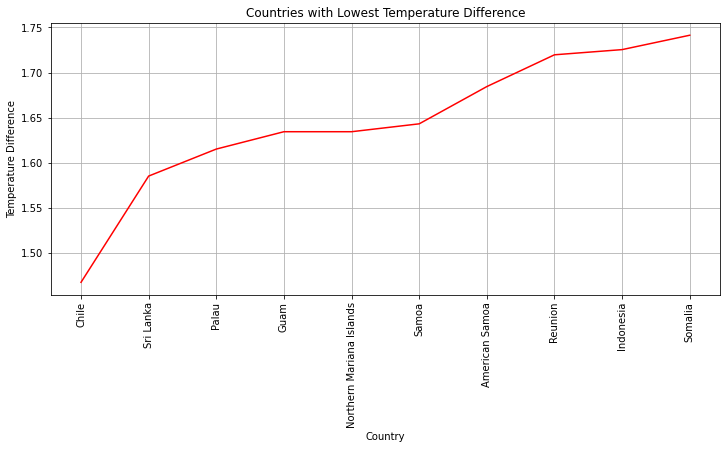

In [16]:
plt.figure(figsize=(12,5))
plt.title('Countries with Lowest Temperature Difference')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Temperature Difference')
plt.plot(country_list_min['Country'],country_list_min['diff'],color='r')
plt.grid(True)

The countries on Nothern and southern hemispheres seems to have witnessed significantly more global warming compared to the tropical countries

Temperature Comparison of Developed Vs. Developing nations:

In [17]:
developed = ['United States', 'United Kingdom', 'France', 'Germany',
             'Japan', 'Canada', 'Switzerland', 'Norway', 'Sweden', 'South Korea', 'Australia']
developed_df=country[country.Country.isin(developed)]
developed_df=developed_df.groupby([developed_df.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
developed_df.head()

,Year,Country,AverageTemperature
0,1743,France,10.203
1,1743,Germany,5.468
2,1743,Norway,-3.503
3,1743,Sweden,-1.444
4,1743,Switzerland,3.572


In [18]:
developing = ['China', 'India', 'Columbia', 'Brazil', 'Mexico', 'Indonesia',
              'Philippines', 'Maldives', 'Turkey', 'South Africa', 'Libya']
developing_df=country[country.Country.isin(developing)]
developing_df=developing_df.groupby([developing_df.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
developing_df.head()

,Year,Country,AverageTemperature
0,1777,Turkey,12.688500
1,1778,Turkey,11.931250
2,1779,Turkey,12.031333
3,1780,Turkey,12.248333
4,1781,Turkey,11.669083


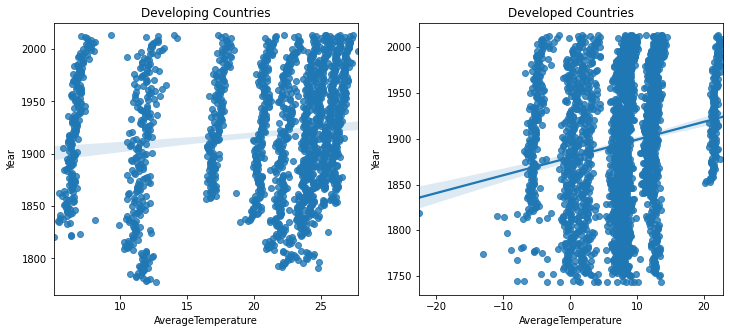

In [19]:

fig, axs = plt.subplots(ncols=2,figsize=(12,5))
sns.regplot(x='AverageTemperature',y='Year',fit_reg=True,data=developing_df, ax=axs[0])
axs[0].set(title = 'Developing Countries')
sns.regplot(x='AverageTemperature',y='Year',fit_reg=True,data=developed_df, ax=axs[1])
axs[1].set(title ='Developed Countries');

Predicting temperature using Linear regression for Developing Countries

In [20]:
developing_df = developing_df[developing_df['Year'] > 1900]

X = developing_df['Year'].values.reshape(-1,1)
Y = developing_df['AverageTemperature']
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#fit the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predict the test set results
y_pred_1 = regressor.predict(X_test)

In [21]:
#coefficient and intercept for developing_df
regressor.coef_, regressor.intercept_

(array([0.00908979]), 2.2545034444454295)

Predicting the temperatures in developing countries in the year 2025.

In [22]:
regressor.predict([[2025]])

array([20.66133658])

Predicting temperature using Linear regression for Developed Countries

In [23]:
developed_df = developed_df[developed_df['Year'] > 1900]

X = developed_df['Year'].values.reshape(-1,1)
Y = developed_df['AverageTemperature']
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#fit the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predict the test set results
y_pred_2 = regressor.predict(X_test)

In [24]:
#coefficient and intercept for developed_df
regressor.coef_, regressor.intercept_

(array([0.01415315]), -19.23072299845706)

Predicting the temperatures in developed countries in the year 2025.

In [25]:
regressor.predict([[2025]])

array([9.42939868])